<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


In [3]:
df.columns

Index(['x', 'y', 'grupo'], dtype='object')

In [4]:
df["grupo"].unique()

array(['Grupo_1', 'Grupo_2', 'Grupo_3', 'Grupo_4'], dtype=object)

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.



 

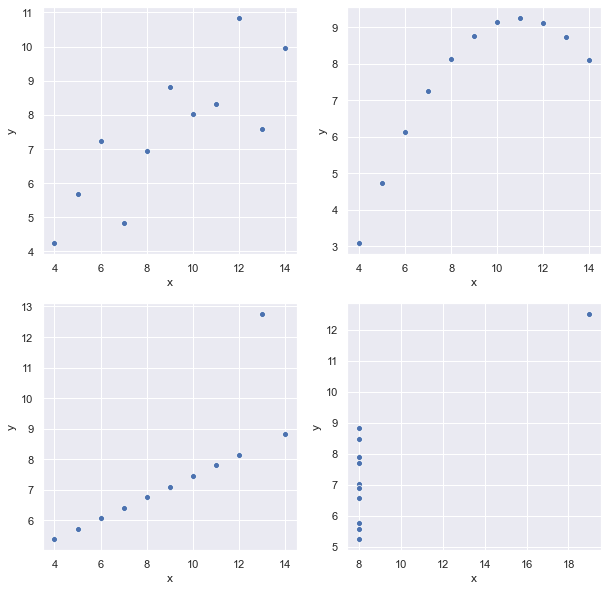

In [5]:
sns.set(rc={'figure.figsize':(10,10)}) # Iniciamos una figura para poner los graficos

#Creamos las máscaras para cada grupo
mask_1 = df["grupo"] == "Grupo_1"
mask_2 = df["grupo"] == "Grupo_2"
mask_3 = df["grupo"] == "Grupo_3"
mask_4 = df["grupo"] == "Grupo_4"

#Graficamos cada grupo en un distinto gráfico, aplicando las máscaras a cada grupo de datos
plt.subplot(2,2,1)
sns.scatterplot(
    x="x",
    y='y',
    data=df[mask_1],
)  
plt.subplot(2,2,2)
sns.scatterplot(
    x="x",
    y='y',
    data=df[mask_2],
)  
plt.subplot(2,2,3)
sns.scatterplot(
    x="x",
    y='y',
    data=df[mask_3],
)  
plt.subplot(2,2,4)
sns.scatterplot(
    x="x",
    y='y',
    data=df[mask_4],
)  
plt.show()

Claramente los grupos son distintos entre si, ya que algunos son demasiado dispersos como lo es el grupo 1, mientras que el grupo 2 se asemeja a una función cuadratica, por otro lado el grupo 3 es una función lineal con un outlier y finalmente el grupo 4 que se asemeja a una recta con pendiente infinita además de un outlier.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [6]:
df[mask_1].describe() #Aplicamos el comando describe() a cada grupo

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [7]:
df[mask_2].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [8]:
df[mask_3].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [9]:
df[mask_4].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Vemos que los promedios de los 4 grupos son bastante similares, tanto para los datos "x" como los datos "y", por lo tanto viendo estos datos sería dificil saber lo diferentes que son como vimos en la pregunta 1. Del mismo modo la varianza tambien tiene valores similares para estos 4 grupos, por lo cual solo mirando estos datos se podría concluir que son bastante parecidos.

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

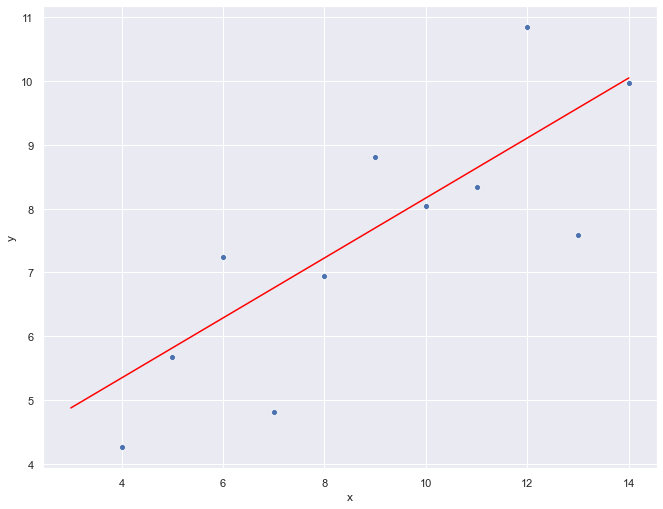

In [10]:
#Importamos las librerías necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression() # Iniciamos el modelo de regresión.

aux_1 =  df[mask_1] #Creamos un dataframe auxiliar con la máscara del grupo

#Iniciamos los datos x e y
X_1 =aux_1[['x']]
y_1 = aux_1['y']

#Definimos los datos de testeo y entrenamiento
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42) 


# Ajustamos el modelo con los datos 
model_1.fit(X_train1, y_train1)

# Iniciamos los coeficientes del modelo       
beta_0 = model_1.intercept_
beta_1 = model_1.coef_[0]

#Iniciamos el rango de los datos de x para graficar        
x_range1 = np.arange(3,15,1)

#Iniciamos un dataframe con los datos que queremos graficar        
df_plot = pd.DataFrame({'x':x_range1,
                        'y_true':[beta_0 + beta_1*n for n in x_range1]})

#Definimos un dataframe auxiliar
aux = pd.DataFrame({'x':X_1['x'],
                           'y_true':y_1})

#Definimos la figura y graficamos los datos y la recta
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=aux, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para este grupo 1 se puede ver que la regresión lineal entrega una recta bastante aceptable, ya que aproxima de manera decente los datos.

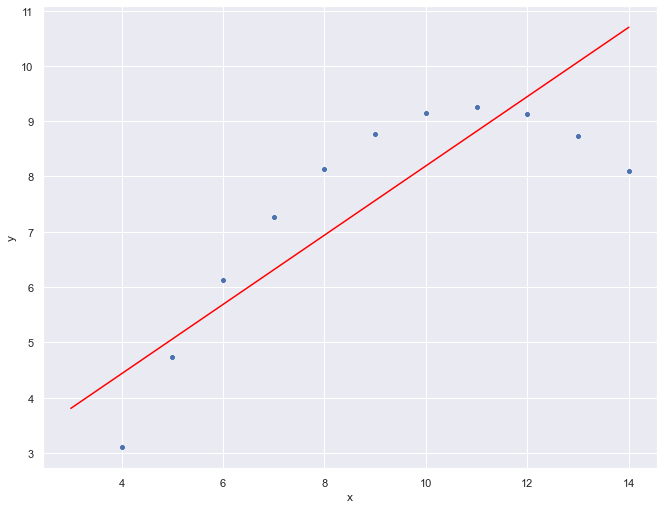

In [11]:
model_2 = LinearRegression() # Iniciamos el modelo de regresión.

aux_2 =  df[mask_2]#Creamos un dataframe auxiliar con la máscara del grupo

#Iniciamos los datos x e y
X_2 =aux_2[['x']]
y_2 = aux_2['y']

#Definimos los datos de testeo y entrenamiento
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)


# Ajustamos el modelo con los datos 
model_2.fit(X_train2, y_train2)

# Iniciamos los coeficientes del modelo
beta_0_2 = model_2.intercept_
beta_1_2 = model_2.coef_[0]

#Iniciamos el rango de los datos de x para graficar
x_range2 = np.arange(3,15,1)

#Iniciamos un dataframe con los datos que queremos graficar 
df_plot_2 = pd.DataFrame({'x':x_range1,
                        'y_true':[beta_0_2 + beta_1_2*n for n in x_range2]})
  
#Definimos un dataframe auxiliar
aux2 = pd.DataFrame({'x':X_2['x'],
                           'y_true':y_2})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=aux2, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_2,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para este grupo 2 podriamos decir que una aproximación lineal no es tan apropiada, debido a que claramente los datos representan una función cuadratica, por lo que podemos decir que la recta que entrega la regresión lineal no es tan buena.

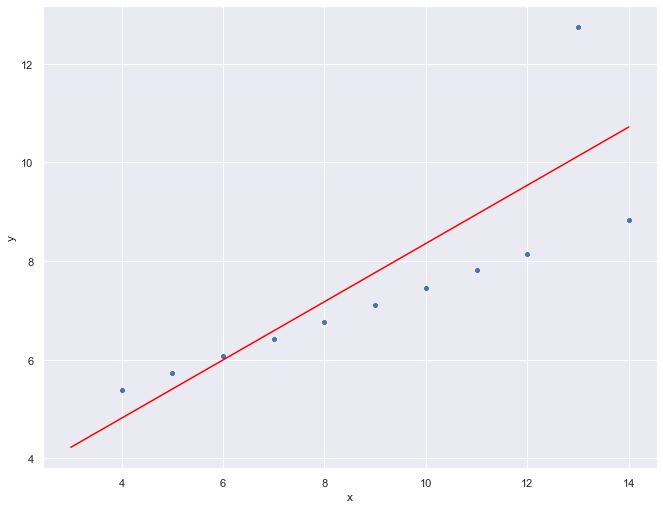

In [12]:
model_3 = LinearRegression() # Iniciamos el modelo de regresión.

aux_3 =  df[mask_3]#Creamos un dataframe auxiliar con la máscara del grupo

#Iniciamos los datos x e y
X_3 =aux_3[['x']]
y_3 = aux_3['y']

#Definimos los datos de testeo y entrenamiento
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)


# Ajustamos el modelo con los datos 
model_3.fit(X_train3, y_train3)

# Iniciamos los coeficientes del modelo   
beta_0_3 = model_3.intercept_
beta_1_3 = model_3.coef_[0]
        
#Iniciamos el rango de los datos de x para graficar
x_range3 = np.arange(3,15,1)

#Iniciamos un dataframe con los datos que queremos graficar 
df_plot_3 = pd.DataFrame({'x':x_range3,
                        'y_true':[beta_0_3 + beta_1_3*n for n in x_range3]})
  
#Definimos un dataframe auxiliar
aux3 = pd.DataFrame({'x':X_3['x'],
                           'y_true':y_3})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=aux3, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_3,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para el grupo 3 vemos claramente que el outlier distorciona completamente la recta de la regresión lineal, ya que claramente los datos representan una recta pero ese outlier impide identificar de buena manera esta recta, es por eso que se podría mejorar esta regresión.

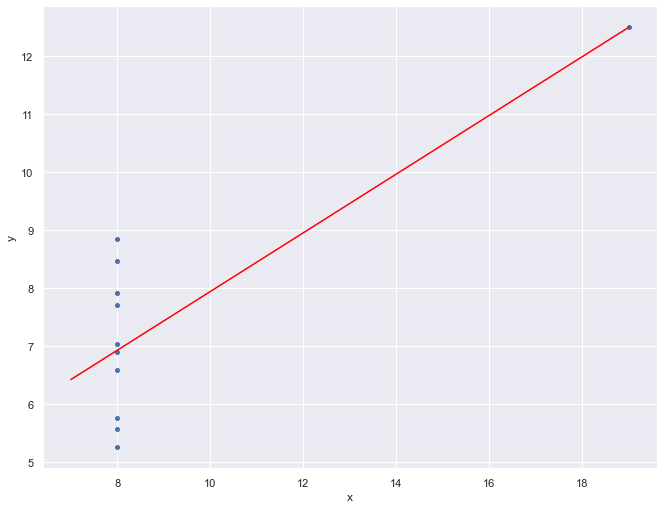

In [13]:
model_4 = LinearRegression() # Iniciamos el modelo de regresión.

aux_4 =  df[mask_4]#Creamos un dataframe auxiliar con la máscara del grupo

#Iniciamos los datos x e y
X_4 =aux_4[['x']]
y_4 = aux_4['y']

#Definimos los datos de testeo y entrenamiento
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)


# Ajustamos el modelo con los datos 
model_4.fit(X_train4, y_train4)

# Iniciamos los coeficientes del modelo   
beta_0_4 = model_4.intercept_
beta_1_4 = model_4.coef_[0]

#Iniciamos el rango de los datos de x para graficar
x_range4 = np.arange(7,20,1)

#Iniciamos un dataframe con los datos que queremos graficar 
df_plot_4 = pd.DataFrame({'x':x_range4,
                        'y_true':[beta_0_4 + beta_1_4*n for n in x_range4]})

#Definimos un dataframe auxiliar
aux4 = pd.DataFrame({'x':X_4['x'],
                           'y_true':y_4})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=aux4, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_4,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Finalmente para este grupo 4 vemos que la regresión lineal no es para nada apropiada, más aun con el outlier, ya que representa una recta con pendiente infinito.

4. Calcule los resultados de las métricas para cada grupo. Interprete.

In [14]:
#Importamos las librerías necesarias
from metrics_regression import *
from sklearn.metrics import r2_score

In [15]:
#Definimos el dataframe con los datos de testeo y los predecidos por el modelo
df_temp1 = pd.DataFrame(
    {
        'y':y_test1,
        'yhat': model_1.predict(X_test1)
        }
)


#Calculamos los errores de las métricas y calculamos r2
df_metrics1 = summary_metrics(df_temp1) #Definimos un dataframe para las métricas
df_metrics1['r2'] =  round(r2_score(y_test1, model_1.predict(X_test1)),4)
print('\nMetricas para el regresor x:\n')
print(df_metrics1)



Metricas para el regresor x:

      mae     mse    rmse   mape   maape   wmape   mmape   smape      r2
0  0.7161  1.2576  1.1214  0.142  0.1354  0.0941  0.1182  0.1196  0.7204


Según los datos obtenidos, vemos que la correlación de los datos es "cercana" a uno por lo que se podría decir que es una buena aproximación y la métrica que nos entrega un menor error es wmape.

In [16]:
#Definimos el dataframe con los datos de testeo y los predecidos por el modelo
df_temp2 = pd.DataFrame(
    {
        'y':y_test2,
        'yhat': model_2.predict(X_test2)
        }
)


#Calculamos los errores de las métricas y calculamos r2
df_metrics2 = summary_metrics(df_temp2)#Definimos un dataframe para las métricas
df_metrics2['r2'] =  r2_score(y_test2, model_2.predict(X_test2))
print('\nMetricas para el regresor x:\n')
print(df_metrics2)


Metricas para el regresor x:

      mae     mse    rmse    mape   maape   wmape   mmape   smape        r2
0  1.4986  2.8504  1.6883  0.1851  0.1813  0.1835  0.1647  0.1752 -3.820687


Para este caso tenemos un valor r2 bastante inusual, podría ser ocasionado por un error en el modelo o en el codigo, pero si este valor fuera correcto, podriamos decir que no existe correlación alguna entre los datos del grupo 2 y la mejor métrica es mmape, ya que tenemos un menor error.

In [17]:
#Definimos el dataframe con los datos de testeo y los predecidos por el modelo
df_temp3 = pd.DataFrame(
    {
        'y':y_test3,
        'yhat': model_3.predict(X_test3)
        }
)


#Calculamos los errores de las métricas y calculamos r2
df_metrics3= summary_metrics(df_temp3)#Definimos un dataframe para las métricas
df_metrics3['r2'] =  round(r2_score(y_test3, model_3.predict(X_test3)),4)
print('\nMetricas para el regresor x:\n')
print(df_metrics3)


Metricas para el regresor x:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9813  1.4548  1.2062  0.1196  0.1184  0.1296  0.1065  0.1105 -0.4807


Al igual que el caso anterior vemos que r2 toma un valor negativo, el cual podría ser producido por un error en el codigo, pero si este valor fuera correcto tenemos de igual manera que en el grupo 2 que los datos no tienen correlación alguna, lo cual es extraño para una regresión lineal de una recta, también tenemos que la mejor métrica es mmape, debido a que nos entrega un menor error.

In [18]:
#Definimos el dataframe con los datos de testeo y los predecidos por el modelo
df_temp4 = pd.DataFrame(
    {
        'y':y_test4,
        'yhat': model_4.predict(X_test4)
        }
)


#Calculamos los errores de las métricas y calculamos r2
df_metrics4 = summary_metrics(df_temp4)#Definimos un dataframe para las métricas
r2_4 = round(r2_score(np.array(y_test4), model_4.predict(X_test4)),4)
df_metrics4['r2'] =  r2_4
print('\nMetricas para el regresor x:\n')
print(df_metrics4)


Metricas para el regresor x:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.4814  0.3671  0.6059  0.0644  0.0642  0.0671  0.0568  0.0668 -0.2071


Para este grupo es más facil ver que los datos no tienen correlación alguna, debido a la forma de su grafica, pero por el valor de r2 no sabría si se puede concluir o no, ya que podría ser producido por un error de codigo, pero de ser cierto, tenemos que confirma la no correlación de los datos y la mejor métrica seria mmape, por tener el menor error.

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario. 

In [19]:
#Definimos las funciones necesarias para probar los diferentes métodos
class SklearnRegressionModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics

    def parameters(self,X,y,test_size):
        model_fit = self.fit_model(X,y,test_size)
        list_betas = [
            ('beta_0',model_fit.intercept_)
                ]
        betas = model_fit.coef_

        for num, beta in enumerate(betas):
            name_beta = f'beta_{num+1}'
            list_betas.append((name_beta,round(beta,2)))

        result = pd.DataFrame(
            columns = ['coef','value'],
            data = list_betas
        )
        
        result['model'] = self.name_model
        return result

In [28]:
from sklearn import linear_model #importamos una función necesaria para aplicar los modelos

Grupo 1

In [29]:
#Definimos los datos según para cada grupo según las operaciones anteriores
X = X_1 
Y = y_1

#Iniciamos los diferentes tipos de regresiones
reg_lineal = linear_model.LinearRegression()
reg_ridge = linear_model.Ridge(alpha=.5)
reg_lasso = linear_model.Lasso(alpha=0.1)

#Creamos una lista con los modelos
list_models =[
    [reg_lineal,'lineal'],
    [reg_ridge,'ridge'],
    [reg_lasso,'lasso'],
]

frames_metrics = []
frames_coef = []

#Para cada modelo calculamos los distintos errores de las métricas
for model,name_models in list_models:
    fit_model =  SklearnRegressionModels( model,name_models)
    frames_metrics.append(fit_model.metrics(X,Y,0.2))
    frames_coef.append(fit_model.parameters(X,Y,0.2))

In [30]:
pd.concat(frames_metrics) #Agrupamos según los modelos

,mae,mse,rmse,mape,maape,wmape,mmape,smape,model
0,0.7161,1.2576,1.1214,0.1420,0.1354,0.0941,0.1182,0.1196,lineal
0,0.7106,1.2622,1.1235,0.1416,0.1350,0.0934,0.1178,0.1190,ridge
0,0.6973,1.2741,1.1288,0.1406,0.1338,0.0917,0.1168,0.1178,lasso


Para el grupo 1 vemos que no se puede hacer mucho, ya que es un grupo bastante disperso, pero probando diferentes métodos vemos que el mejor es el metodo lineal, por lo que dejarlo tal cual es lo apropiado.

Grupo 2

In [31]:
#Definimos los datos según para cada grupo según las operaciones anteriores
X = X_2 
Y = y_2

#Iniciamos los diferentes tipos de regresiones
reg_lineal = linear_model.LinearRegression()
reg_ridge = linear_model.Ridge(alpha=.5)
reg_lasso = linear_model.Lasso(alpha=0.1)

#Creamos una lista con los modelos
list_models =[
    [reg_lineal,'lineal'],
    [reg_ridge,'ridge'],
    [reg_lasso,'lasso'],
]

frames_metrics = []
frames_coef = []

#Para cada modelo calculamos los distintos errores de las métricas
for model,name_models in list_models:
    fit_model =  SklearnRegressionModels( model,name_models)
    frames_metrics.append(fit_model.metrics(X,Y,0.2))
    frames_coef.append(fit_model.parameters(X,Y,0.2))

In [32]:
pd.concat(frames_metrics)#Agrupamos según los modelos

,mae,mse,rmse,mape,maape,wmape,mmape,smape,model
0,1.4986,2.8504,1.6883,0.1851,0.1813,0.1835,0.1647,0.1752,lineal
0,1.4913,2.8126,1.6771,0.1841,0.1804,0.1826,0.1638,0.1745,ridge
0,1.4798,2.7539,1.6595,0.1826,0.1790,0.1812,0.1625,0.1733,lasso


Para este segundo grupo vemos que tampoco se puede hacer mucho, ya que su grafica es una función cuadratica, por ende una regreasión lineal es lo menos apropiado, de esta forma probando los diferentes métodos, tenemos que el mejor es el método Lasso.

Grupo 3

In [24]:
aux_out3 = df[mask_3]#Iniciamos un dataframe auxiliar para el grupo
mask_out3 = aux_out3["y"] <= 10 #Creamos una máscara para los outliers del grupo

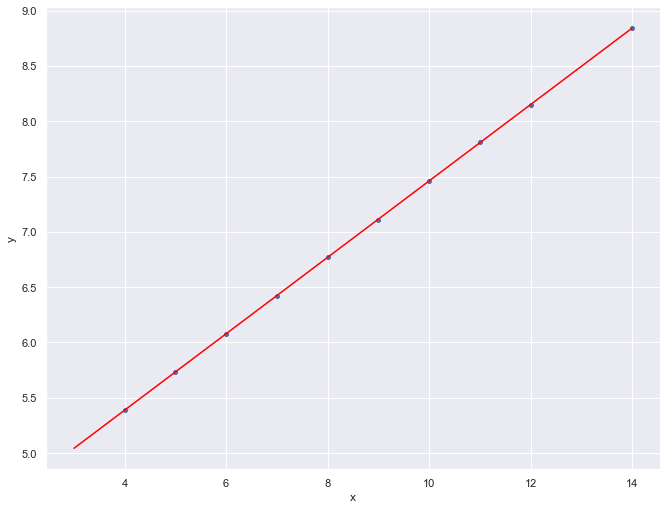

In [25]:
model_3 = LinearRegression() # Iniciamos el modelo de regresión.

aux_3 = aux_out3[mask_out3]#Creamos un dataframe auxiliar con la máscara del grupo

#Iniciamos los datos x e y
X_3 =aux_3[['x']]
y_3 = aux_3['y']

#Definimos los datos de testeo y entrenamiento
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)


# Ajustamos el modelo con los datos 
model_3.fit(X_train3, y_train3)

# Iniciamos los coeficientes del modelo   
beta_0_3 = model_3.intercept_
beta_1_3 = model_3.coef_[0]
        
#Iniciamos el rango de los datos de x para graficar
x_range3 = np.arange(3,15,1)

#Iniciamos un dataframe con los datos que queremos graficar 
df_plot_3 = pd.DataFrame({'x':x_range3,
                        'y_true':[beta_0_3 + beta_1_3*n for n in x_range3]})
  
#Definimos un dataframe auxiliar
aux3 = pd.DataFrame({'x':X_3['x'],
                           'y_true':y_3})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=aux3, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_3,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para este grupo 3 vemos que con simplemente retirar el outlier, mejoramos completamente la regresión lineal por lo que es la mejor solución para este problema.

Grupo 4

In [26]:
aux_out4 = df[mask_4] #Iniciamos un dataframe auxiliar para el grupo 
mask_out4 = aux_out4["y"] <= 10 #Creamos una máscara para los outliers del grupo

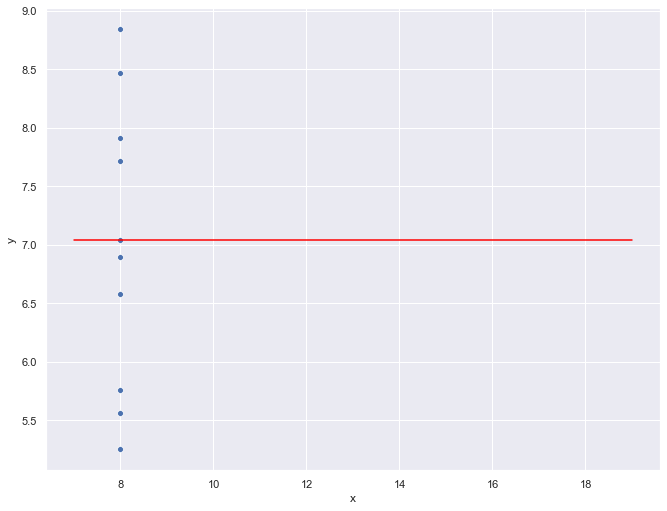

In [27]:
model_4 = LinearRegression() # Iniciamos el modelo de regresión.

aux_4 =  aux_out4[mask_out4]#Creamos un dataframe auxiliar con la máscara del grupo

#Iniciamos los datos x e y
X_4 =aux_4[['x']]
y_4 = aux_4['y']

#Definimos los datos de testeo y entrenamiento
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)


# Ajustamos el modelo con los datos 
model_4.fit(X_train4, y_train4)

# Iniciamos los coeficientes del modelo   
beta_0_4 = model_4.intercept_
beta_1_4 = model_4.coef_[0]

#Iniciamos el rango de los datos de x para graficar
x_range4 = np.arange(7,20,1)

#Iniciamos un dataframe con los datos que queremos graficar 
df_plot_4 = pd.DataFrame({'x':x_range4,
                        'y_true':[beta_0_4 + beta_1_4*n for n in x_range4]})

#Definimos un dataframe auxiliar
aux4 = pd.DataFrame({'x':X_4['x'],
                           'y_true':y_4})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=aux4, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_4,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

De igual forma para este ultimo grupo, la mejor estrategia es eliminar el outlier pero de todas formas seguimos teniendo nula correlación entre los datos, por lo que no se puede hacer mucho.